In [2]:
import matplotlib.pyplot as plt
import SQL_example as sqllib
import numpy as np
from scipy.ndimage import gaussian_filter

In [4]:
'''
date1 = '20240308'
serial1 = '312'

data1 = sqllib.loadData(serial1, date1)
ldata1 = sqllib.loadLabelledData(serial1, date1)

date2 = '20240309'
serial2 = '312'

data2 = sqllib.loadData(serial2, date2)
ldata2 = sqllib.loadLabelledData(serial2, date2)
'''
date = '20240101'
serial = '312'

data = sqllib.loadData(serial, date)
ldata = sqllib.loadLabelledData(serial, date)






Data from device #312 on 20240101 successfully loaded.
1390 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240101 successfully loaded.
1390 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]



In [6]:
x = []
mean = []
min = []
max = []
for line in ldata:
    if line[-1] == 1 or line[-1] == -1:
        continue
    x.append(line[0])
    min.append(line[3])
    max.append(line[4])
    mean.append(line[2])


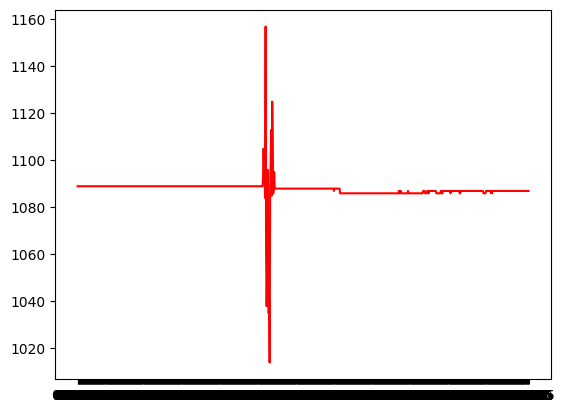

In [7]:
#plt.plot(x, min, color='blue', label='Line 1')
#plt.plot(x, max, color='green', label='Line 2')
plt.plot(x, mean, color='red', label='Line 3')

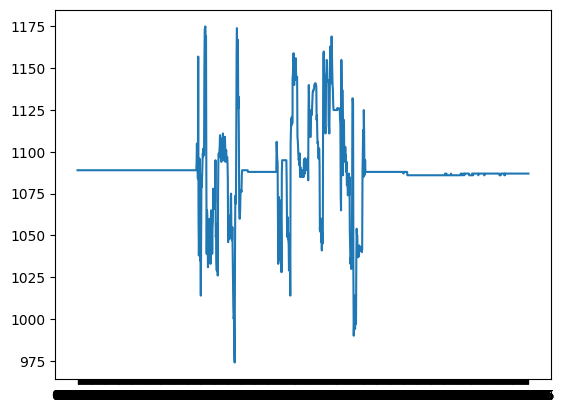

In [11]:
plt.plot(x, mean)

In [5]:
print(len(ldata))
print(ldata[1000])
ldata[-1]
# from UTC+8 23:00:00 -> 1500xx

1390
['163601', '20240101', 1088.0, 1075.0, 1104.0, 9.0, 0]


['235945', '20240101', 1087.0, 1069.0, 1104.0, 16.0, 0]

In [15]:
data = sqllib.loadLabelledData(serial, date)
running = [(1418, 1427), (1555, 1605), (1852, 1858), (1903, 1907), (1914, 1949), (1957, 2032), (2037, 2041), (2047, 2053), (2133, 2201), (2206, 2233)]
head = running[0][0] - 800
tail = running[-1][-1] - 800
headList = range(head-5, head+5)
tailList = range(tail-5, tail+5)

for i in range(len(data)):
    instant = int(data[i][0][0:4])
    if instant in headList:
        left = i - 30
    elif instant in tailList:
        right = i + 30

mean_sum = 0
min_sum = 0
max_sum = 0
cnt = 0

for i in range(0, left):
    if data[i][-1] == -1:
        continue
    mean_sum += data[i][2]
    min_sum += data[i][3]
    max_sum += data[i][4]
    cnt += 1

print(mean_sum / cnt)
print(min_sum / cnt)
print(max_sum / cnt)

mean_sum = 0
min_sum = 0
max_sum = 0
cnt = 0

for i in range(right, len(data)):
    if data[i][-1] == -1:
        continue
    mean_sum += data[i][2]
    min_sum += data[i][3]
    max_sum += data[i][4]
    cnt += 1

print(mean_sum / cnt)
print(min_sum / cnt)
print(max_sum / cnt)

'''
1087.7541966426859
1069.8309352517986
1109.310551558753

1088.5
1070.0416666666667
1109.1416666666667

1089.0
1069.5859154929578
1111.2760563380282
1086.830897703549
1070.0125260960333
1107.8538622129436
'''


Labelled data from device #312 on 20240101 successfully loaded.
1390 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]

1089.0
1069.5859154929578
1111.2760563380282
1086.830897703549
1070.0125260960333
1107.8538622129436


'\n1087.7541966426859\n1069.8309352517986\n1109.310551558753\n\n1088.5\n1070.0416666666667\n1109.1416666666667\n'

In [3]:
date1 = '20240306'
date2 = '20240307'
date3 = '20240308'
date4 = '20240309'
serial = '312'

ldata1 = sqllib.loadLabelledData(serial, date1)
ldata2 = sqllib.loadLabelledData(serial, date2)
ldata3 = sqllib.loadLabelledData(serial, date3)
ldata4 = sqllib.loadLabelledData(serial, date4)



Labelled data from device #312 on 20240306 successfully loaded.
1442 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240307 successfully loaded.
1442 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240308 successfully loaded.
1441 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]


Labelled data from device #312 on 20240309 successfully loaded.
1442 lines of data loaded in total.
Format: [Time, Date, SVM_mean, SVM_min, SVM_max, SVM_SD]



['204949', '20240306', 1105.0, 893.0, 1420.0, 49.0, 0]


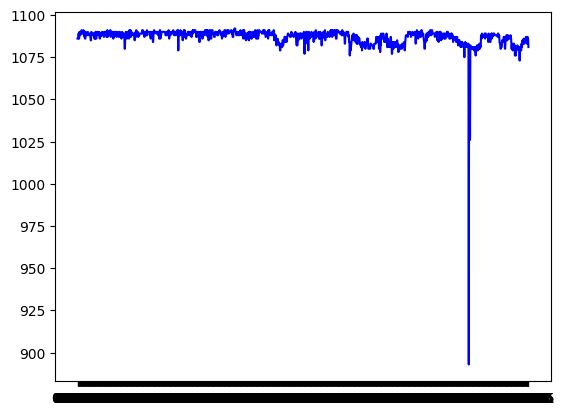

In [5]:

x = []
mean = []
min = []
max = []
for line in ldata1:
    if line[-1] == -1:
        continue
    elif int(line[3]) < 1000:
        print(line)
    x.append(line[0])
    min.append(line[3])
    max.append(line[4])
    mean.append(line[2])

plt.plot(x, min, color='blue', label='Line 1')
#plt.plot(x, max, color='green', label='Line 2')
#plt.plot(x, mean, color='red', label='Line 3')

In [5]:
d1 = [[], [], [], []]
d2 = [[], [], [], []]
d3 = [[], [], [], []]
d4 = [[], [], [], []]

for i in range(min([len(ldata1), len(ldata2), len(ldata3), len(ldata4)])):
    if ldata1[i][-1] != -1:
        d1[0].append(ldata1[i][0])
        d1[1].append(ldata1[i][2])
        d1[2].append(ldata1[i][3])
        d1[3].append(ldata1[i][4])
    if ldata2[i][-1] != -1:
        d2[0].append(ldata2[i][0])
        d2[1].append(ldata2[i][2])
        d2[2].append(ldata2[i][3])
        d2[3].append(ldata2[i][4])
    if ldata3[i][-1] != -1:
        d3[0].append(ldata3[i][0])
        d3[1].append(ldata3[i][2])
        d3[2].append(ldata3[i][3])
        d3[3].append(ldata3[i][4])
    if ldata4[i][-1] != -1:
        d4[0].append(ldata4[i][0])
        d4[1].append(ldata4[i][2])
        d4[2].append(ldata4[i][3])
        d4[3].append(ldata4[i][4])



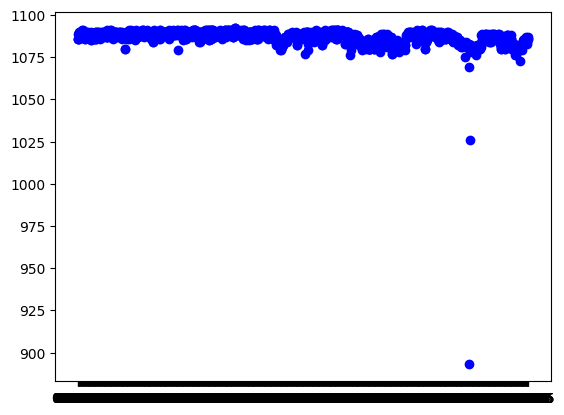

In [6]:
plt.scatter(d1[0], d1[2], color='blue', label='Line 1')
#plt.plot(x, max, color='green', label='Line 2')
#plt.plot(x, mean, color='red', label='Line 3')

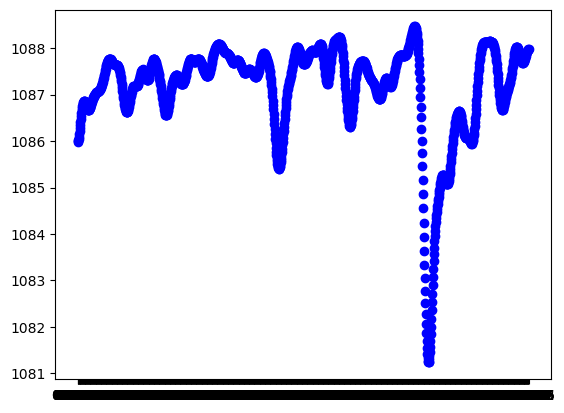

In [17]:
sigma = 10.0

gau_mean = gaussian_filter(min, sigma)
plt.scatter(x, gau_mean, color='blue', label='Line 1')

In [ ]:
import numpy as np

def kalman_filter(measurements, initial_mean, initial_covariance, process_noise, measurement_noise):
    # 初始化状态向量和协方差矩阵
    mean = initial_mean
    covariance = initial_covariance

    filtered_means = []
    filtered_covariances = []

    for measurement in measurements:
        # 预测步骤
        predicted_mean = mean
        predicted_covariance = covariance + process_noise

        # 更新步骤
        measurement_residual = measurement - predicted_mean
        measurement_residual_covariance = predicted_covariance + measurement_noise
        kalman_gain = predicted_covariance / measurement_residual_covariance
        mean = predicted_mean + kalman_gain * measurement_residual
        covariance = (1 - kalman_gain) * predicted_covariance

        filtered_means.append(mean)
        filtered_covariances.append(covariance)

    return filtered_means, filtered_covariances

# 测试示例
measurements = [1.2, 1.7, 2.4, 2.8]  # 测量序列
initial_mean = 0  # 初始状态均值
initial_covariance = 1  # 初始状态协方差
process_noise = 0.1  # 过程噪声方差
measurement_noise = 0.2  # 测量噪声方差

filtered_means, filtered_covariances = kalman_filter(measurements, initial_mean, initial_covariance, process_noise, measurement_noise)

# 打印输出结果
for mean, covariance in zip(filtered_means, filtered_covariances):
    print(f"Mean: {mean}, Covariance: {covariance}")